# Mail scraping using imapclient

__In this notebook I will be using the python package `IMAPClient` to scrape my emails to see who emails me the most, and `seaborn` to plot results.__

In [1]:
from imapclient import IMAPClient
import email
from dotenv import load_dotenv, find_dotenv
import os
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
load_dotenv(find_dotenv())

True

In [4]:
server = IMAPClient(host='imap.gmail.com', 
                    ssl=True,
                    port=993,
                    use_uid=True)
server.login(os.environ["mail_username"], os.environ["mail_pass_app_specific"])

b'james.twose2711@gmail.com authenticated (Success)'

In [5]:
select_info = server.select_folder('INBOX')
print('%d messages in INBOX' % select_info[b'EXISTS'])

27209 messages in INBOX


In [6]:
messages = server.search()

In [7]:
# messages = server.search(['FROM', 'auto-bevestiging@amazon.nl'])
print("%d messages" % len(messages[20209:27209]))

7000 messages


In [8]:
df = pd.DataFrame()
for msgid, data in server.fetch(messages[20209:27209], ['ENVELOPE']).items():
    envelope = data[b'ENVELOPE']
    # print('ID #%d: "%s" received %s' % (msgid, envelope.subject.decode(), envelope.date))
    tmp_df = pd.DataFrame({
    "msgID": msgid,
        "from": str(envelope.from_[0].name)[1:].replace("'", ""),
    "subject": envelope.subject.decode(),
    "date_recieved": envelope.date
             }, index=[0])
    df = pd.concat([df, tmp_df])

In [9]:
_ = df.reset_index(inplace=True, drop=True)

In [16]:
df.head()

,msgID,from,subject,date_recieved
0,28520,Twitter,"Denny Borsboom shared ""Stop met het zoeken naa...",2021-02-26 13:15:53
1,28521,StackSocial,This Patented Golf Training Aid Used By the Pr...,2021-02-26 13:33:43
2,28522,natlachaman,Re: [Neurocast/data-science-core] Review of so...,2021-02-26 13:51:12
3,28523,Giovanni Licitra,Re: [Neurocast/data-science-core] Review of so...,2021-02-26 13:36:48
4,28524,Giovanni Licitra,Re: [Neurocast/data-science-core] Review of so...,2021-02-26 13:37:22


In [11]:
server.logout()

b'LOGOUT Requested'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   msgID          7000 non-null   int64         
 1   from           7000 non-null   object        
 2   subject        7000 non-null   object        
 3   date_recieved  7000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 218.9+ KB


In [13]:
plot_df = (df["from"]
 .value_counts()
 .to_frame("amount_emails")
 .reset_index()
 .rename(columns={"index": "user"})
)

In [14]:
plot_df.head()

,user,amount_emails
0,Twitter,483
1,StackSocial,352
2,Giovanni Licitra (Jira),265
3,gerriekevdw,246
4,StackSkills,236


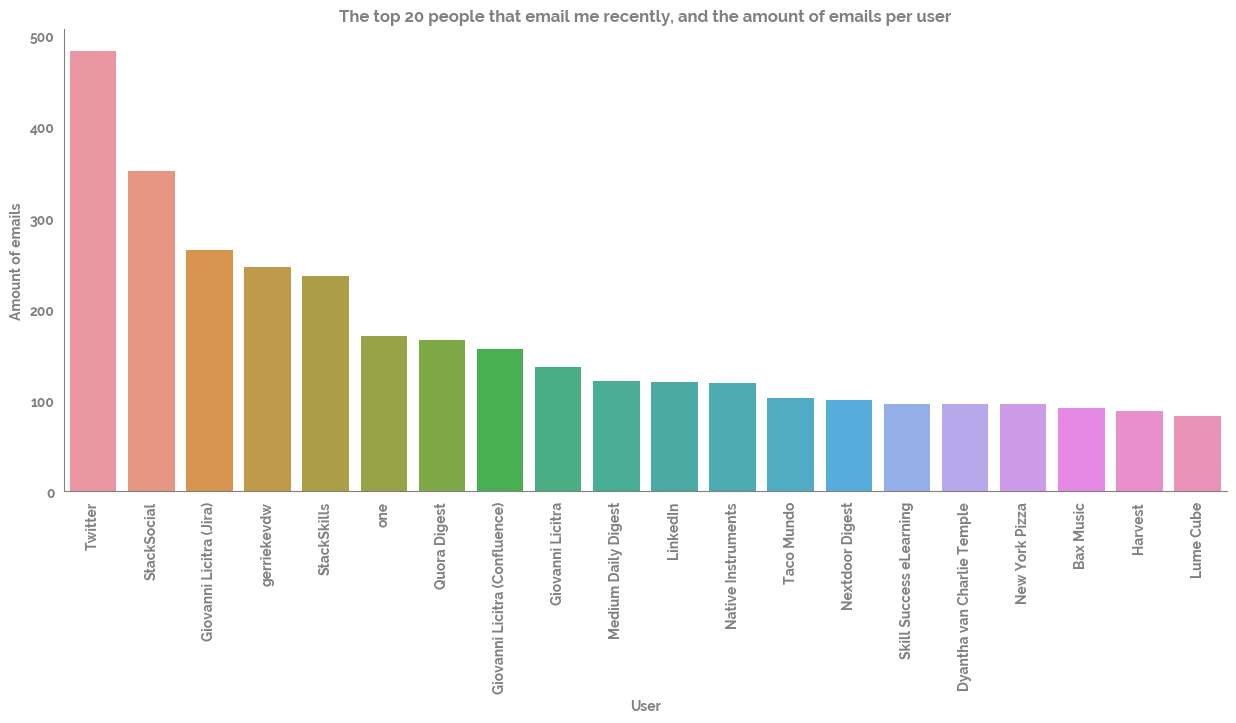

In [18]:
_ = plt.figure(figsize=(15, 6))
_ = sns.barplot(data=plot_df.head(20),
                x="user",
                y="amount_emails")
_ = plt.title("The top 20 people that email me recently, and the amount of emails per user")
_ = plt.xticks(rotation=90)
_ = plt.xlabel("User")
_ = plt.ylabel("Amount of emails")
_ = sns.despine()